In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn import svm
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

In [2]:
col_names = ["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","class"]
df = pd.read_table(r"C:\ITI\Machine Learning 1\Lab 7\iris.data", header=None, delimiter=",")
df.columns = col_names
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isna().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

In [6]:
print(df.shape)
df = df.drop_duplicates()
df.shape

(150, 5)


(147, 5)

In [7]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

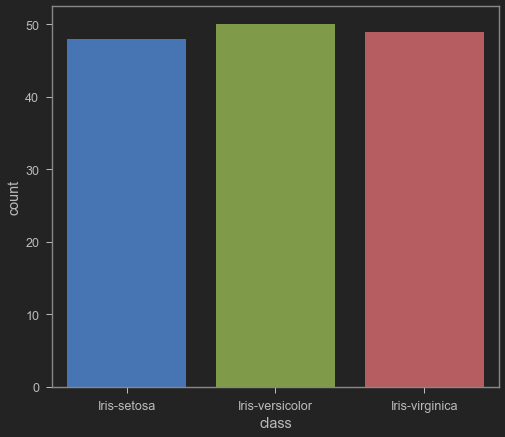

In [8]:
sns.countplot(x = df['class'],label="Count")
plt.show()

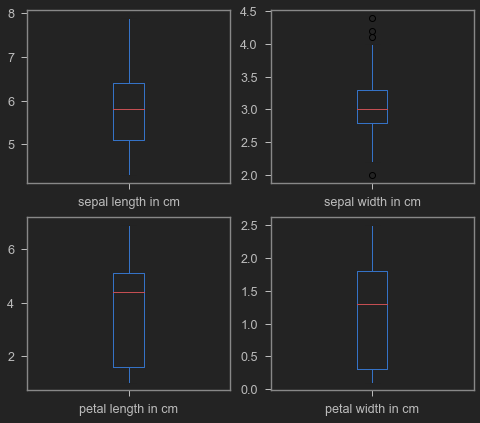

In [9]:
df.plot(kind='box', subplots=True, layout=(2,2))
plt.show()

In [10]:
columns = ["sepal length in cm" , "sepal width in cm"]

In [11]:
for col in columns :
    Q1 = np.percentile(df[col], 25,interpolation = 'midpoint') 
    Q3 = np.percentile(df[col], 75,interpolation = 'midpoint') 
    IQR = Q3 - Q1 
    print(f'IQR=%.3f for {col}', IQR)   

IQR=%.3f for sepal length in cm 1.3000000000000007
IQR=%.3f for sepal width in cm 0.5


In [12]:
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['sepal width in cm'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['sepal width in cm'] <= (Q1-1.5*IQR))
  

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (147, 5)
New Shape:  (143, 5)


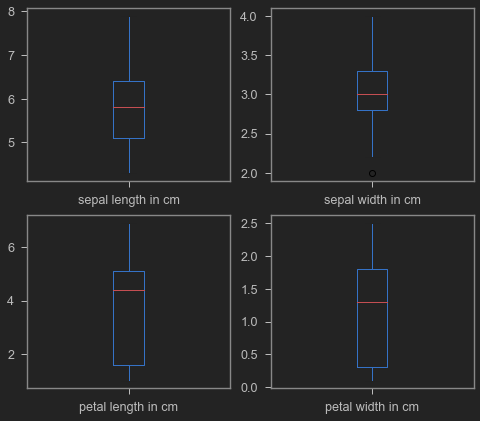

In [13]:
df.plot(kind='box', subplots=True, layout=(2,2))
plt.show()

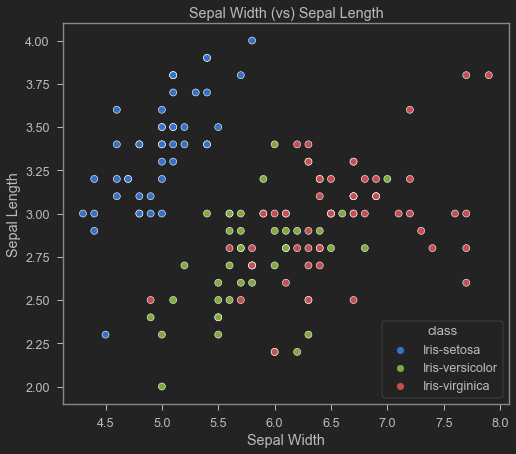

In [14]:
sns.scatterplot(x = "sepal length in cm",y = "sepal width in cm" , data = df , hue = "class" )
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.title("Sepal Width (vs) Sepal Length")
plt.show()

In [15]:
encoder = OrdinalEncoder()
X = df.iloc[:, :2]
Y = df[["class"]]
Encoded_Data = np.array(encoder.fit_transform(Y).ravel())

In [16]:
X

,sepal length in cm,sepal width in cm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [17]:
Y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,Encoded_Data,random_state = 42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
def accuracy(Model) :
    train_score = Model.score(X_train ,y_train)
    test_score = Model.score(X_test ,y_test)
    #print("Accuracy for training set is :",train_score )
    #print("Accuracy for testing set is :",test_score )
    return train_score  , test_score

# SVM.linearSVC 

In [19]:
lst = [[0 , 0],[1 , 0],[0 , 1],[1 , 1]]
lst[0]

[0, 0]

In [20]:
def Linear_SVC(X_train ,X_test , y_train , y_test , tolerence ) :
    C = [1 , 10 , 100 , 1000 ]
    target_names = ["Iris-virginica","Iris-setosa","Iris-versicolor"]
    fig, axs = plt.subplots(2, 2 , figsize = (20,25))
    fig.suptitle("SVM.linearSVC")
    i , j = 0 , 0
    for c in C :
        linear_SVC_1 = svm.LinearSVC(tol = tolerence , C = c)
        linear_SVC_1.fit(X_train,y_train.ravel())
        train_score , test_score = accuracy(linear_SVC_1)
        predictions = linear_SVC_1.predict(X_test)
        #print(classification_report(y_test ,predictions , target_names = target_names))
        y_plot = y_train.astype(int)
        plot_decision_regions(X_train, y_plot, clf=linear_SVC_1, legend = 1 , ax = axs[i,j])
        axs[i,j].set_title(f"For C Equal {c} \n\n Accuracy for training set is : {train_score} \n\n Accuracy for training set is : {test_score}" )
        if i == 0 :
            if j == 0 :
                j += 1 
            else :
                j -= 1
                i += 1
        else :
            j += 1      
    plt.show()

C:\Users\10\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\10\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


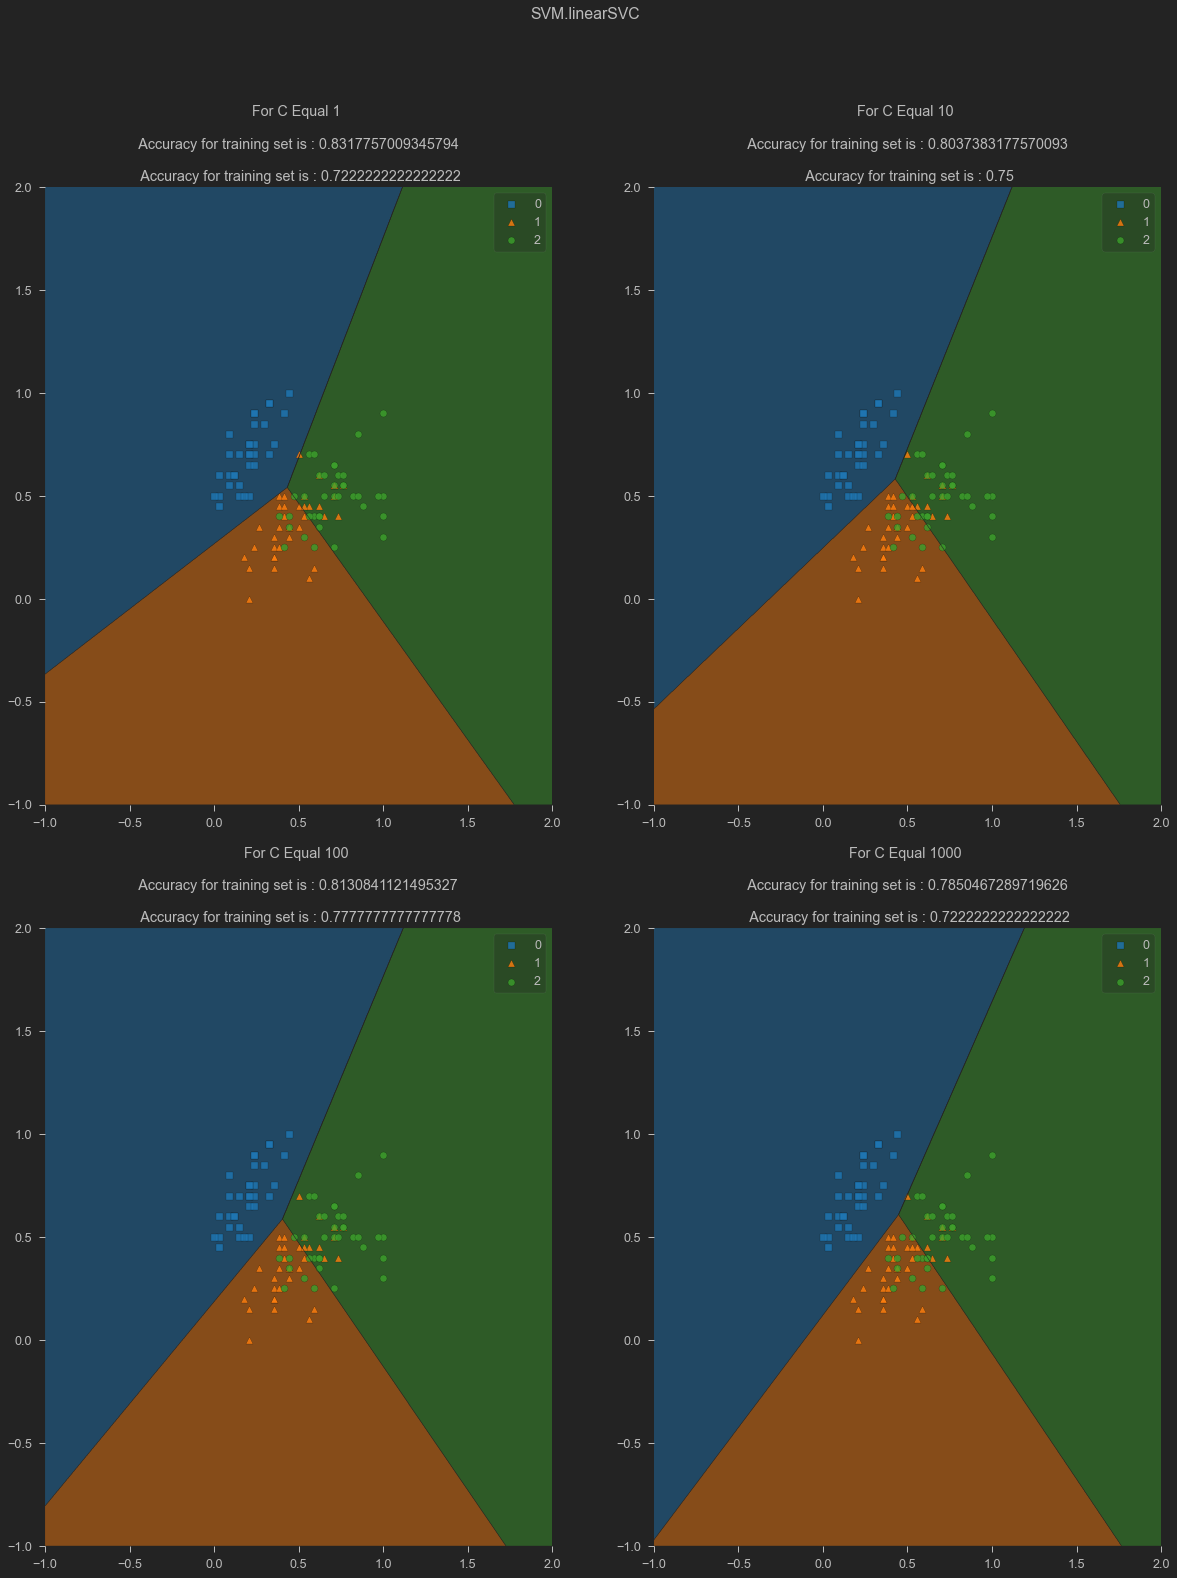

In [21]:
Linear_SVC(X_train , X_test , y_train , y_test , 0.1 )

In [22]:
def compute_SVC(X_train ,X_test , y_train , y_test , tolerence , kernel , gamma , poly_degree ) :
    C = [1 , 10 , 100 , 1000 ]
    target_names = ["Iris-virginica","Iris-setosa","Iris-versicolor"]
    fig, axs = plt.subplots(2, 2 , figsize = (20,25))
    fig.suptitle("SVM.linearSVC")
    i , j = 0 , 0
    for c in C :
        svc = svm.SVC(tol = tolerence , C = c , kernel = kernel , gamma = gamma , degree = poly_degree)
        svc.fit(X_train,y_train.ravel())
        train_score , test_score = accuracy(svc)
        predictions = svc.predict(X_test)
        #print(classification_report(y_test ,predictions , target_names = target_names))
        y_plot = y_train.astype(int)
        plot_decision_regions(X_train, y_plot, clf=svc, legend = 1 , ax = axs[i,j])
        axs[i,j].set_title(f"For C Equal {c} \n\n Accuracy for training set is : {train_score} \n\n Accuracy for training set is : {test_score}" )
        if i == 0 :
            if j == 0 :
                j += 1 
            else :
                j -= 1
                i += 1
        else :
            j += 1      
    plt.show()

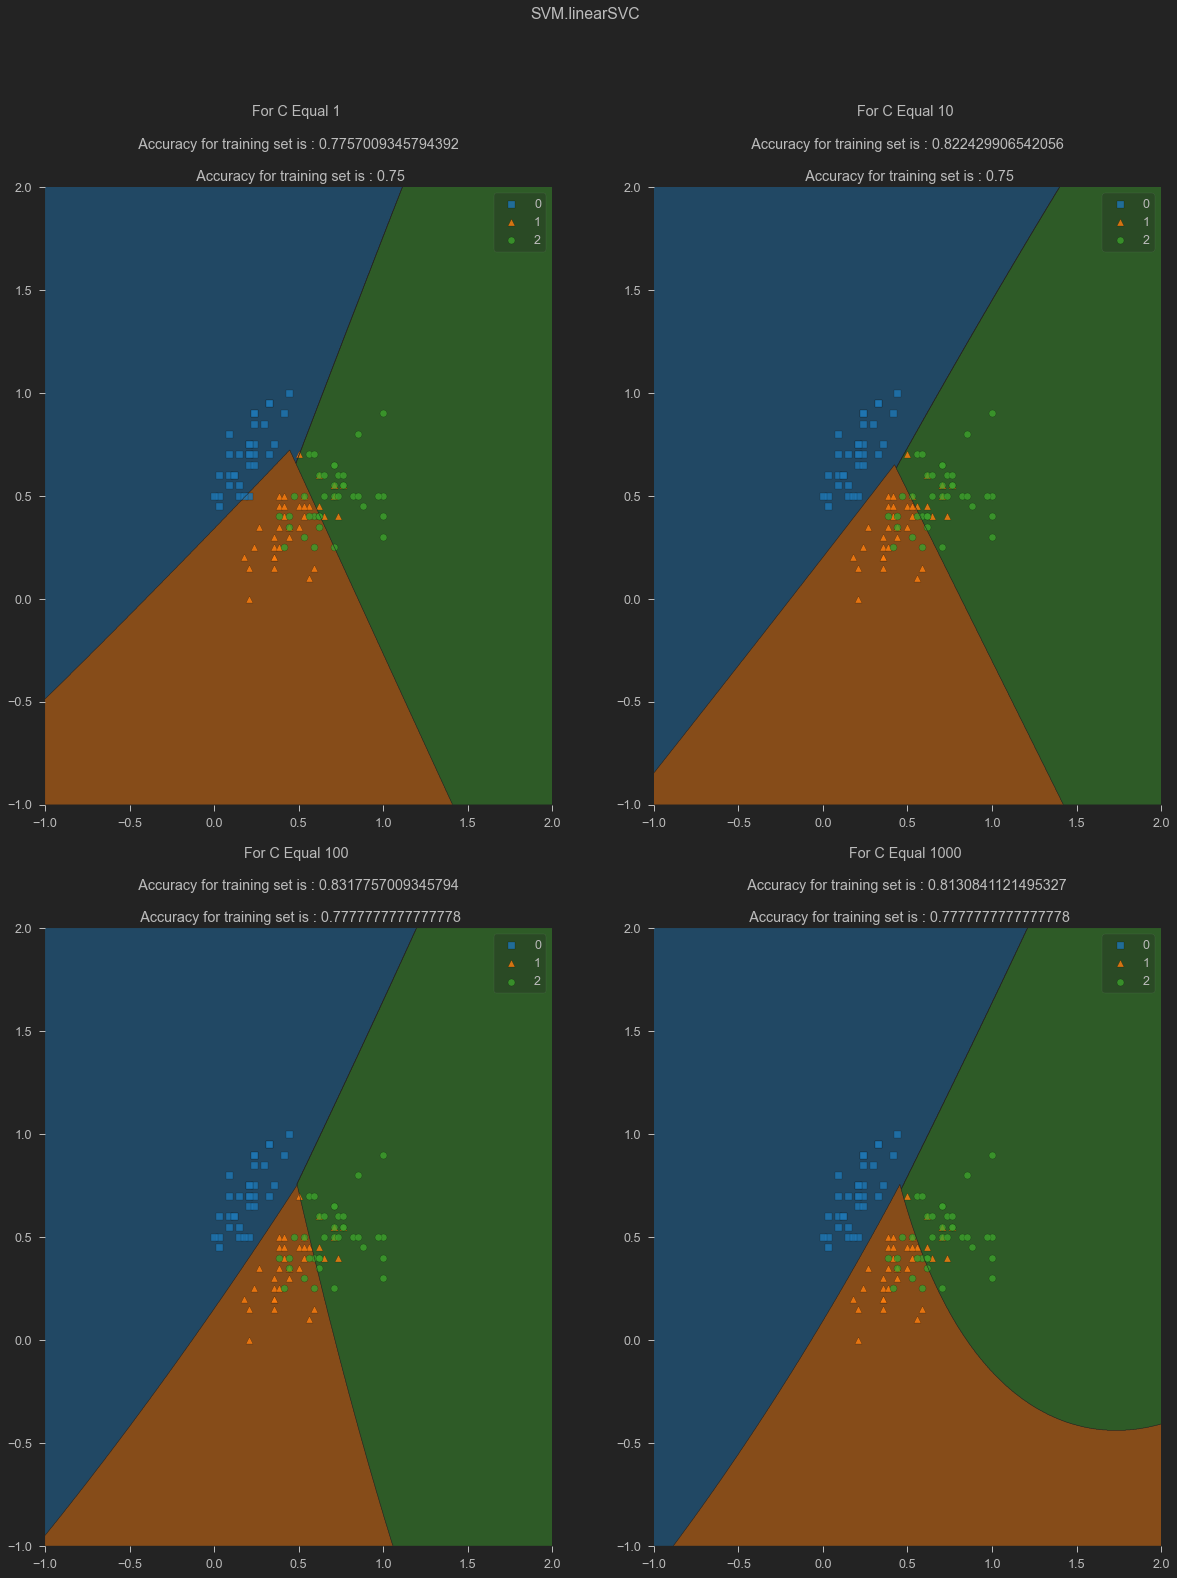

In [23]:
compute_SVC(X_train ,X_test , y_train , y_test , 0.1 , "rbf" , 0.1 , 2)

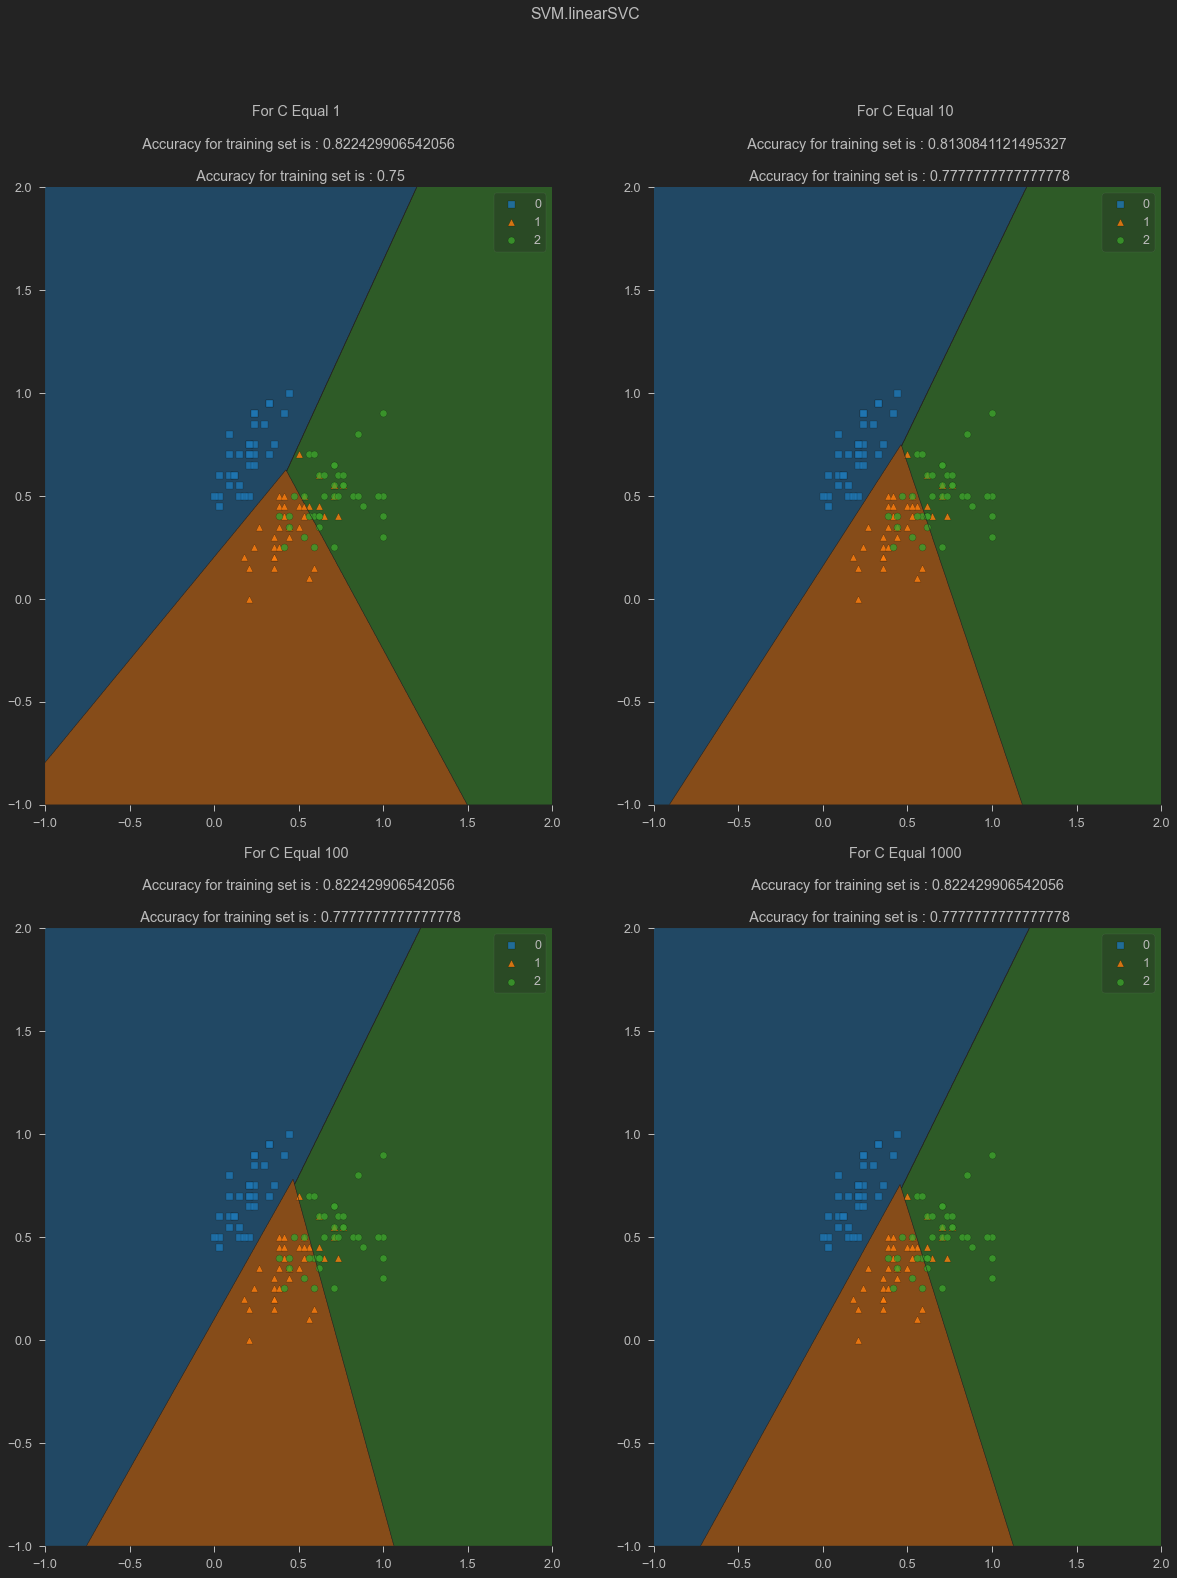

In [24]:
compute_SVC(X_train ,X_test , y_train , y_test , 0.1 , "linear" , 0.1 , 2)

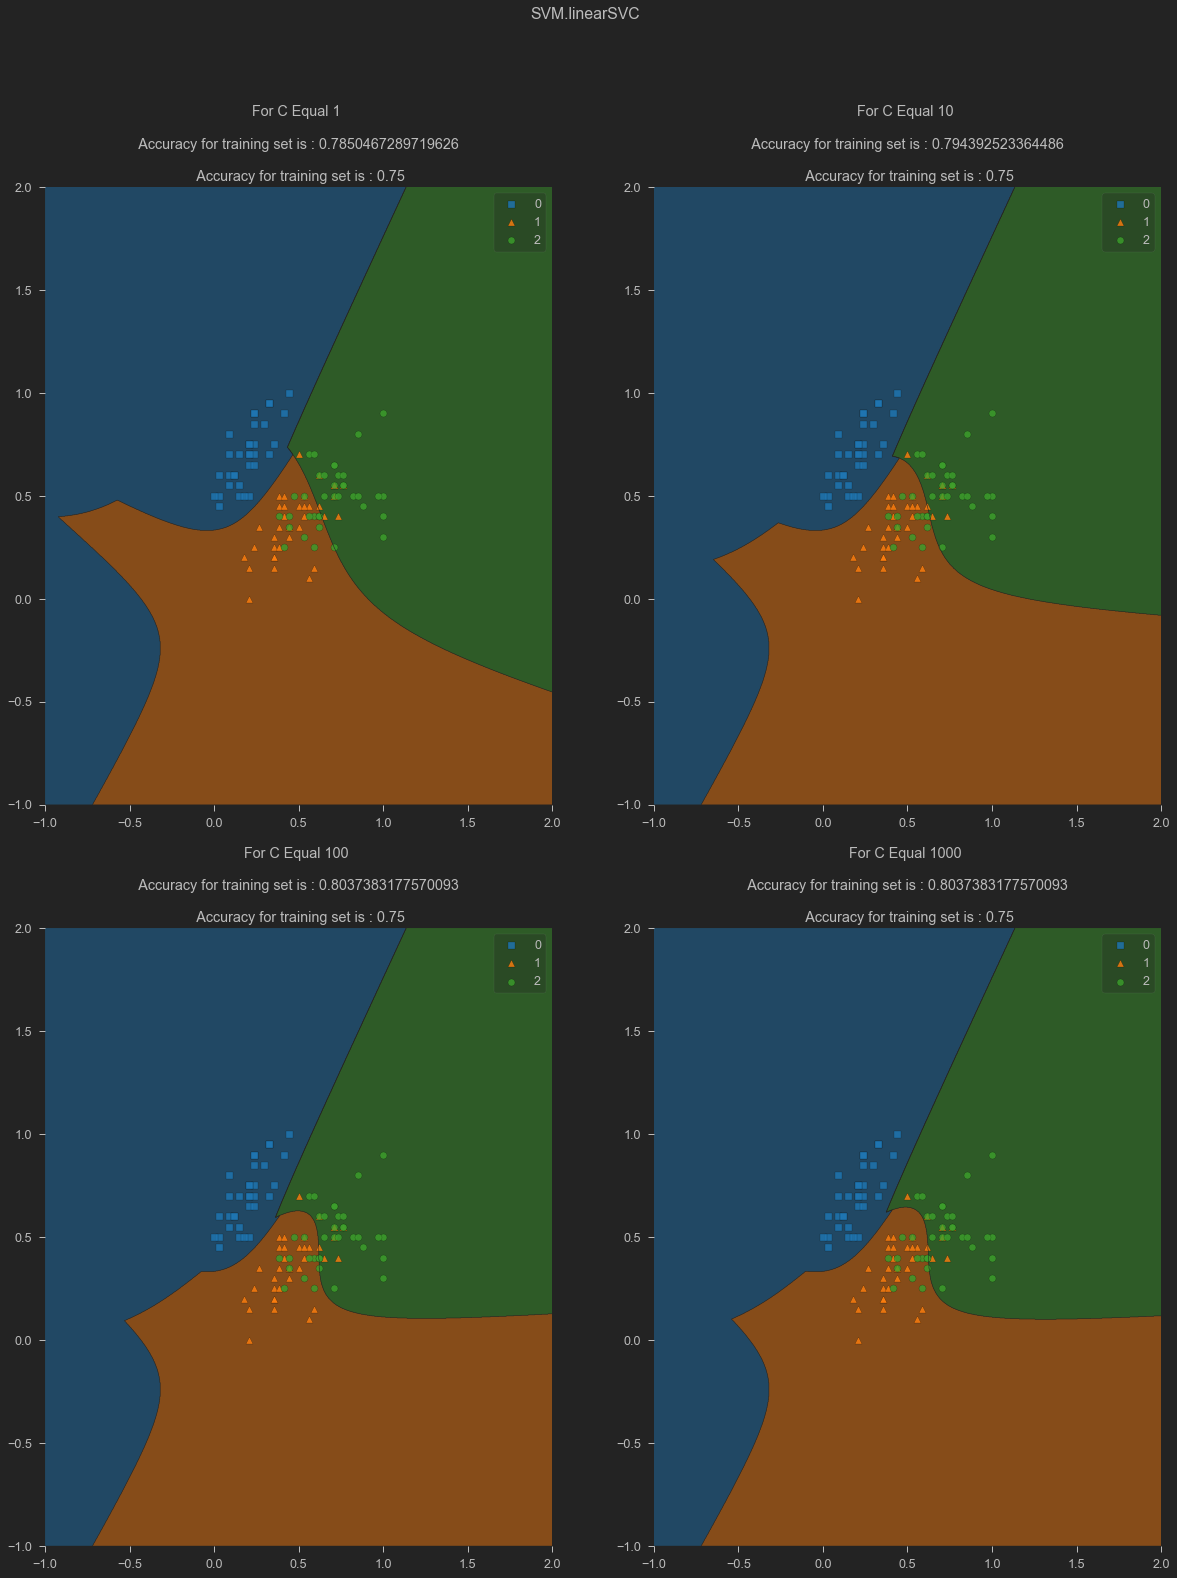

In [25]:
compute_SVC(X_train ,X_test , y_train , y_test , 0.1 , "poly" , 10 , 3)